In [1]:
#Here we import all the necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import time
import amuse.plot as plot
from IPython.display import clear_output
from amuse.lab import units, constants
from amuse.ext.orbital_elements import new_binary_from_orbital_elements
from amuse.ext.orbital_elements import get_orbital_elements_from_binary
from amuse.ext.orbital_elements import get_orbital_elements_from_binaries
from amuse.lab import Particles
from amuse.lab import nbody_system
from amuse.io import write_set_to_file, read_set_from_file

In [2]:
data_loc = "Results/"

In [6]:
logtimes = ['-inf','4.300','4.602','4.778','4.903','4.999','5.0','5.002','5.004','5.006','5.008','5.010','5.305','5.479','5.603','5.699','5.778','6.740','7.017','7.184','7.305','7.399','7.477','7.542','7.599','7.650','7.695']
logtimes2 = ['-inf','4.300','4.602','4.778','4.903','4.999','5.0','5.002','5.004','5.006','5.008','5.010','5.305','5.479','5.603','5.699','5.778','6.740','7.017','7.184','7.305','7.399','7.477','7.542','7.599','7.650']

runs = ['Vanilla_Tack_run1', 'Vanilla_Tack_run3']
for run in runs:
    for i in range(len(logtimes)):
        exec(run+'_'+str(i)+'= read_set_from_file(data_loc+\"'+run+'_time='+logtimes[i]+'.hdf5\", format="hdf5")')

for i in range(len(logtimes2)):
    exec('Vanilla_Tack_run2_'+str(i)+'= read_set_from_file(data_loc+\"Vanilla_Tack_run2_time='+logtimes[i]+'.hdf5\", format="hdf5")')

logtimes = [-1e9,4.300,4.602,4.778,4.903,4.999,5.0,5.002,5.004,5.006,5.008,5.010,5.305,5.479,5.603,5.699,5.778,6.740,7.017,7.184,7.305,7.399,7.477,7.542,7.599,7.650,7.695]
logtimes2 = [-1e9,4.300,4.602,4.778,4.903,4.999,5.0,5.002,5.004,5.006,5.008,5.010,5.305,5.479,5.603,5.699,5.778,6.740,7.017,7.184,7.305,7.399,7.477,7.542,7.599,7.650]
times = 10**np.array(logtimes)
times2 = 10**np.array(logtimes2)

In [24]:
sets_1GT, sets_2GT, sets_3GT = [], [], []
for i in range(len(logtimes)):
    exec("sets_1GT.append(Vanilla_Tack_run1_"+str(i)+")")
    exec("sets_3GT.append(Vanilla_Tack_run3_"+str(i)+")")

for i in range(len(logtimes2)):
    exec("sets_2GT.append(Vanilla_Tack_run2_"+str(i)+")")

In [34]:
p1GT = np.load('percentage1GT.npy')
p2GT = np.load('percentage2GT.npy')
p3GT = np.load('percentage3GT.npy')

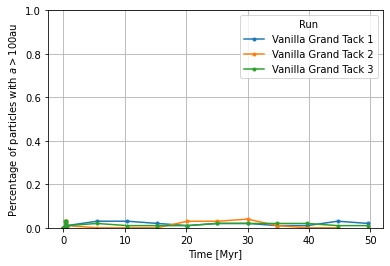

In [35]:
plt.plot(times/1e6, p1GT, marker='.', label='Vanilla Grand Tack 1')
plt.plot(times2/1e6, p2GT, marker='.', label='Vanilla Grand Tack 2')
plt.plot(times/1e6, p3GT, marker='.', label='Vanilla Grand Tack 3')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of particles with $a>100$au")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

In [36]:
p1GT[-1], p2GT[-1], p3GT[-1]

(0.020202020202020204, 0.0, 0.01)

In [13]:
p1GT = np.load('vrel_vesc_percentage1GT.npy')
p2GT = np.load('vrel_vesc_percentage2GT.npy')
p3GT = np.load('vrel_vesc_percentage3GT.npy')

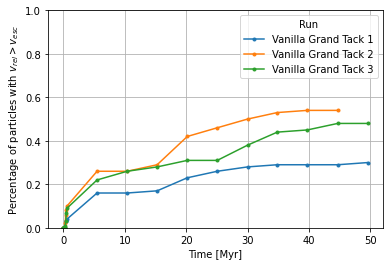

In [15]:
plt.plot(times/1e6, p1GT, marker='.', label='Vanilla Grand Tack 1')
plt.plot(times2/1e6, p2GT, marker='.', label='Vanilla Grand Tack 2')
plt.plot(times/1e6, p3GT, marker='.', label='Vanilla Grand Tack 3')

plt.xlabel("Time [Myr]")
plt.ylabel("Percentage of particles with $v_{rel}>v_{esc}$")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

In [16]:
p1GT = np.load('deleted_percentage1GT.npy')
p2GT = np.load('deleted_percentage2GT.npy')
p3GT = np.load('deleted_percentage3GT.npy')

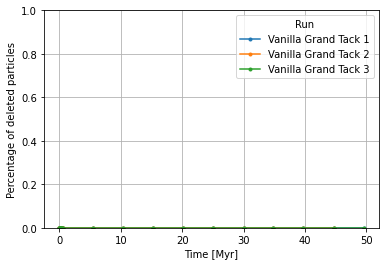

In [18]:
plt.plot(times/1e6, p1GT, marker='.', label='Vanilla Grand Tack 1')
plt.plot(times2/1e6, p2GT, marker='.', label='Vanilla Grand Tack 2')
plt.plot(times/1e6, p3GT, marker='.', label='Vanilla Grand Tack 3')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of deleted particles")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

In [37]:
p1GT = np.load('pot_oort_percentage1GT.npy')
p2GT = np.load('pot_oort_percentage2GT.npy')
p3GT = np.load('pot_oort_percentage3GT.npy')

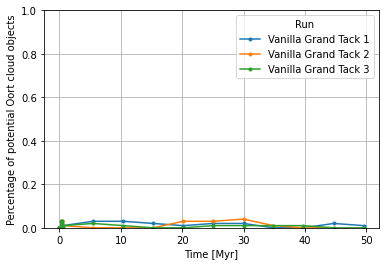

In [38]:
plt.plot(times/1e6, p1GT, marker='.', label='Vanilla Grand Tack 1')
plt.plot(times2/1e6, p2GT, marker='.', label='Vanilla Grand Tack 2')
plt.plot(times/1e6, p3GT, marker='.', label='Vanilla Grand Tack 3')
plt.xlabel("Time [Myr]")
plt.ylabel(r"Percentage of potential Oort cloud objects")
plt.grid()
plt.ylim(0, 1)
plt.legend(title='Run')
plt.show()

In [39]:
p1GT[-1], p2GT[-1], p3GT[-1]

(0.01, 0.0, 0.0)

In [40]:
Oort_a_1GT = np.load('begin_a_pot_Oort_1GT.npy')
Oort_a_2GT = np.load('begin_a_pot_Oort_2GT.npy')
Oort_a_3GT = np.load('begin_a_pot_Oort_3GT.npy')

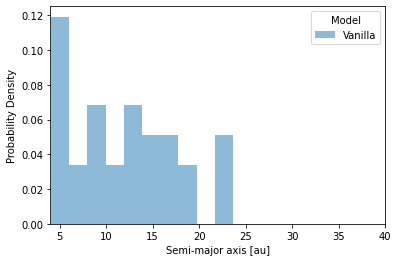

In [41]:
Oort_as_van = np.append(np.append(Oort_a_1GT, Oort_a_2GT), Oort_a_3GT)

plt.hist(Oort_as_van, alpha=0.5, label='Vanilla', density=True)
plt.xlim(4,40)
plt.xlabel('Semi-major axis [au]')
plt.ylabel('Probability Density')
plt.legend(title='Model')
plt.show()

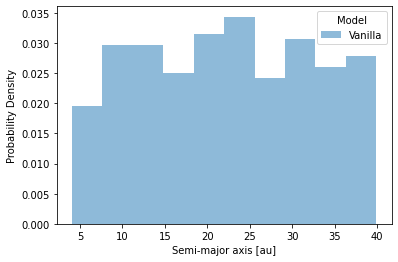

In [27]:
def a_orbit(Sun, particles):
    return get_orbital_elements_from_binaries(Sun, particles, constants.G)[2]

Sun = Particles(1)
Sun.name = 'SUN'
Sun.mass = 1 | units.MSun
Sun.position = (0| units.AU, 0| units.AU, 0| units.AU)
Sun.velocity = (0|units.kms, 0| units.kms, 0|units.kms)

initial_as_1GT = a_orbit(Sun, sets_1GT[0][4:]).in_(units.AU).number
initial_as_2GT = a_orbit(Sun, sets_2GT[0][4:]).in_(units.AU).number
initial_as_3GT = a_orbit(Sun, sets_3GT[0][4:]).in_(units.AU).number

vanilla_initial_as = np.append(np.append(initial_as_1GT, initial_as_2GT), initial_as_3GT)

plt.hist(vanilla_initial_as, alpha=0.5, density=True, label='Vanilla')
plt.xlabel("Semi-major axis [au]")
plt.ylabel("Probability Density")
plt.legend(title='Model');

In [28]:
Oort_e_1GT = np.load('begin_e_pot_Oort_1GT.npy')
Oort_e_2GT = np.load('begin_e_pot_Oort_2GT.npy')
Oort_e_3GT = np.load('begin_e_pot_Oort_3GT.npy')

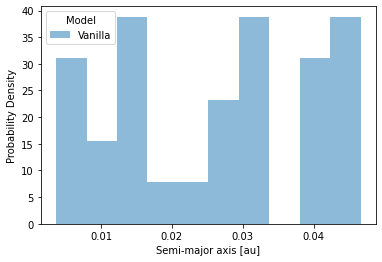

In [29]:
Oort_es_van = np.append(np.append(Oort_e_1GT, Oort_e_2GT), Oort_e_3GT)

plt.hist(Oort_es_van, alpha=0.5, label='Vanilla', density=True)
plt.xlabel('Semi-major axis [au]')
plt.ylabel('Probability Density')
plt.legend(title='Model')
plt.show()

In [30]:
Oort_i_1GT = np.load('begin_i_pot_Oort_1GT.npy')
Oort_i_2GT = np.load('begin_i_pot_Oort_2GT.npy')
Oort_i_3GT = np.load('begin_i_pot_Oort_3GT.npy')

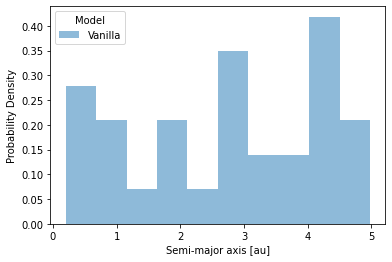

In [31]:
Oort_is_van = np.append(np.append(Oort_i_1GT, Oort_i_2GT), Oort_i_3GT)

plt.hist(Oort_is_van, alpha=0.5, label='Vanilla', density=True)
plt.xlabel('Semi-major axis [au]')
plt.ylabel('Probability Density')
plt.legend(title='Model')
plt.show()